# ¡Hola Jean! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class='alert alert-block alert-success'>
<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class='alert alert-block alert-warning'>
<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class='alert alert-block alert-danger'>

<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class='alert alert-block alert-info'>
<b>Respuesta estudiante.</b> <a class='tocSkip'></a>
</div>

Mucho éxito en el proyecto!

## Resumen de la revisión v1 <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Hola Jean, ¿cómo va todo? Espero que estés teniendo una buena jornada.

Buen trabajo completando todos los puntos del notebook. El proyecto en general está bien logrado, con una correcta implementación del código necesario. Sin embargo, se debe corregir el cálculo de la tabla que recopila los consumos mensuales y que se utiliza para el cálculo del ingreso por usuario. Esto afecta a los análisis de la segunda parte, por lo que no puedo revisarlos aún. Te dejé anotaciones en rojo con observaciones puntuales para que puedas hacer esos ajustes.

Ante cualquier duda, no dudes en dejar un comentario en azul. Con gusto lo atenderé en la próxima iteración.

Saludos!


</div>

## Resumen de la revisión v2 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor  v2 </b> <a class="tocSkip"></a>

Bien hecho Jean, buen trabajo con las últimas correcciones. Has terminado completamente las tareas necesarias del notebook, no tengo comentarios de corrección adicionales, tu proyecto está aprobado. Los conocimientos que aplicaste aquí te serán muy útiles para análisis futuros, mucho éxito!

Saludos!

</div>

----

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [164]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns 
from matplotlib import pyplot as plt

## Cargar datos

In [165]:
# Carga los archivos de datos en diferentes DataFrames
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

In [166]:
df_calls.info() #sin valores nulos
df_calls.duplicated().sum()#sin filas con valores duplicados
#call_date es un tipo object (string), para tratar los valores es mejor que sea un tipo "datatime"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


0

In [167]:
df_internet.info() #sin datos nulos
df_internet.duplicated().sum() #sin lineas con datos repetidos
# session_date es un tipo object (string), para tratar los valores es mejor que sea un tipo "datatime"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


0

In [168]:
df_messages.info() #sin datos nulos
df_messages.duplicated().sum() #sin lineas con datos repetidos
#message_date es un tipo object (string), para tratar los valores es mejor que sea un tipo "datatime"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


0

In [169]:
df_plans.info() #sin datos nulos
df_plans.duplicated().sum() #sin lineas con datos repetidos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


0

In [170]:
df_users.info() # churn_date solo tiene 34 valores no nulos
df_users.duplicated().sum() #sin lineas con datos repetidos
#reg_date es un tipo object (string), para tratar los valores es mejor que sea un tipo "datatime"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


0

Se puede evidenciar que la mayoria de los valores de todos los DF son no nulos, lo cual genera mas confianza y se puede ser mas preciso al momento de realizar el analisis

<div class="alert alert-block alert-success">
<b>Comentario de Revisor   </b> <a class="tocSkip"></a>


Ok, correcto este primer análisis


</div>

## Tarifas

In [171]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [172]:
# Imprime una muestra de los datos para las tarifas
df_plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Se evidencia 8 tipos de columnas, donde de la 0 a la 4 tienen valores tipo "int64", la 5 y 6 tienen "float64" y  la ultima es un tipo "object". Desde mi persrpectiva veo todo bien, las columnas coinciden con el tipo de dato que manejan, lo que veo es que los del plan surf pagan mas por gb, mensaje y minuto que los del plan ultimate, pero hasta no realizar un analisis no se puede concluir si convienen que los precios esten asi o no.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

No se evidencia problema con los datos brindados

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

<div class="alert alert-block alert-success">
<b>Comentario de Revisor   </b> <a class="tocSkip"></a>

Bien, correcto. Se podría haber modificado el consumo de internet incluido, de mb a gb, pero no es obligatorio.



</div>

## Usuarios/as

In [173]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [174]:
print("Hay",df_users['plan'].isna().sum(), "duplicados engañosos")
df_users.head()


Hay 0 duplicados engañosos


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Se observa que los datos que usan una fecha, no son un datetime sino un tipo string, tanto la columna reg_date como la de churn_date. La correccion se ha de hacer cambiando el tipo de dato con .to_datetime() para asi despues poder hacer uso de esas columnas. Aunque  para churn_date no es estrictamente necesario, mejor realizar el cambio de una vez.
Adicional, con la informacion que nos provee python de este DF en la columna churn_date, se puede ver que 34 usuarios dejaron el servicio, en caso de querer hacer un seguimmiento a porque dejaron el servicio, se puede extraer estos 34 clientes y realizar un analisis aprte.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [175]:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])
df_users.info() # aqui ya se puede ver que la columna churn_date paso de ser object a datatime64
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    object        
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [176]:
df_users['mes'] = df_users['reg_date'].dt.to_period('M').astype(str)
registro = df_users.groupby('mes')['user_id'].count().reset_index()
registro.columns = ['mes','n_users']
registro

,mes,n_users
0,2018-01,49
1,2018-02,42
2,2018-03,40
3,2018-04,45
4,2018-05,38
5,2018-06,54
6,2018-07,36
7,2018-08,47
8,2018-09,32
9,2018-10,42


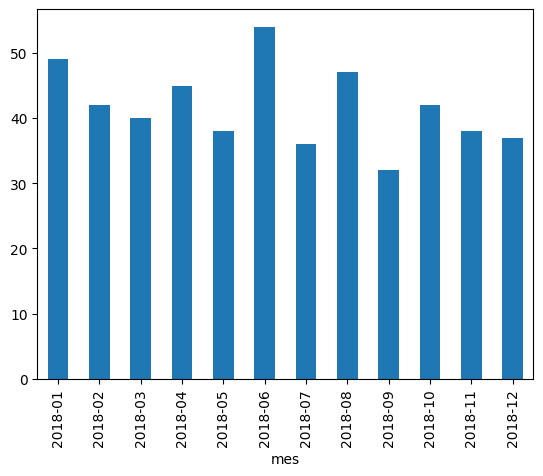

In [177]:
registro.plot(kind='bar', x='mes', legend=False)
plt.show()

Aqui se puede  ver que en los meses 1, 4, 6 y 8 hubo una mayor contratacion de los planes, o sea, en estos meses fueron donde mas clientes llegaron a la empresa. Aqui se podria mirar que fue lo que se hizo en esos meses y si se encuentra una correlacion entre la accion y el aumento de clientes se puede repetir e incluso mejorar para maximizar la captacion de nuevos clientes.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor   </b> <a class="tocSkip"></a>

Muy bien, correcta esta parte de los usuarios.





</div>

## Llamadas

In [178]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [179]:
# Imprime una muestra de datos para las llamadash
print("Hay", df_calls['id'].duplicated().sum(),"dupicados engañosos")
df_calls.head()

Hay 0 dupicados engañosos


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Se comprobobo que no hubieran datos engañosos ni filas repetidas,  tambien hay que corregir lo del  tipo de dato de "call_date", pasarlo de tipo object a tipo datatime.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [180]:
import math 
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [181]:
df_calls.describe()['duration']

count    137735.000000
mean          6.745927
std           5.839241
min           0.000000
25%           1.290000
50%           5.980000
75%          10.690000
max          37.600000
Name: duration, dtype: float64

In [182]:
df_calls['mes'] = df_calls['call_date'].dt.to_period('M').astype(str)
df_calls

,id,user_id,call_date,duration,mes
0,1000_93,1000,2018-12-27,8.52,2018-12
1,1000_145,1000,2018-12-27,13.66,2018-12
2,1000_247,1000,2018-12-27,14.48,2018-12
3,1000_309,1000,2018-12-28,5.76,2018-12
4,1000_380,1000,2018-12-30,4.22,2018-12
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,2018-11
137731,1499_200,1499,2018-10-20,10.89,2018-10
137732,1499_201,1499,2018-09-21,8.12,2018-09
137733,1499_202,1499,2018-10-10,0.37,2018-10


In [183]:
df_calls['duration'] = np.ceil(df_calls['duration'])
df_calls # Ya fue aproximado hacia arriba los minutos consumidos.
minuts_calls = df_calls.groupby(['user_id','mes'])['duration'].sum().reset_index()
##minuts_calls['duration'] = np.ceil(minuts_calls['duration']) # error anterior
minuts_calls

,user_id,mes,duration
0,1000,2018-12,124.0
1,1001,2018-08,182.0
2,1001,2018-09,315.0
3,1001,2018-10,393.0
4,1001,2018-11,426.0
...,...,...,...
2253,1498,2018-12,339.0
2254,1499,2018-09,346.0
2255,1499,2018-10,385.0
2256,1499,2018-11,308.0


<div class="alert alert-block alert-danger">
<b>Comentario de Revisor   </b> <a class="tocSkip"></a>


Ojo con esta parte, se debe aproximar hacia arriba cada llamada, no el total de minutos agrupados. Por lo tanto, se debe realizar la aproximación antes de hacer el groupby()


</div>

<div class='alert alert-block alert-info'>
<b> 
    Ya fue corregida la parte de la aproximacion hacia arriba
    .</b> <a class='tocSkip'></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor   </b> <a class="tocSkip"></a>

Bien hecho, correcto



</div>

## Mensajes

In [184]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [185]:
# Imprime una muestra de datos para los mensajes
print("Hay",df_messages['id'].isna().sum(), "datos ausentes en el DF") # sin datos ausentes
print("Hay",df_messages['id'].duplicated().sum(), "duplicados engañosos en el DF") 
df_messages.head()

Hay 0 datos ausentes en el DF
Hay 0 duplicados engañosos en el DF


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Se compobo que no hubieran datos ausentes, repetidos ni duplicados engañosos, tambien hay que corregir el tipo de dato de la columna "message_date"

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [186]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [187]:
df_messages['mes'] = df_messages['message_date'].dt.to_period('M').astype(str)

In [188]:
send_messages = df_messages.groupby(['user_id','mes'])['message_date'].count().reset_index()
send_messages.columns = ['user_id','mes', 'n_messages']
send_messages

,user_id,mes,n_messages
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36
...,...,...,...
1801,1496,2018-09,21
1802,1496,2018-10,18
1803,1496,2018-11,13
1804,1496,2018-12,11


<div class="alert alert-block alert-success">
<b>Comentario de Revisor   </b> <a class="tocSkip"></a>


Ok, correcto, aunque no era necesario agruparlo en esta parte


</div>

## Internet

In [189]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [190]:
# Imprime una muestra de datos para el tráfico de internet
print("Hay", df_internet['id'].duplicated().sum(), "duplicados engañosos")
print("Hay", df_internet[['id','user_id']].duplicated().sum(), "duplicados engañosos")
df_internet.head()


Hay 0 duplicados engañosos
Hay 0 duplicados engañosos


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Se compobo que no hubieran datos ausentes, repetidos ni duplicados engañosos, tambien hay que corregir el tipo de dato de la columna "session_date"

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [191]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [192]:
df_internet['mes'] = df_internet['session_date'].dt.to_period('M').astype(str)
df_internet

,id,user_id,session_date,mb_used,mes
0,1000_13,1000,2018-12-29,89.86,2018-12
1,1000_204,1000,2018-12-31,0.00,2018-12
2,1000_379,1000,2018-12-28,660.40,2018-12
3,1000_413,1000,2018-12-26,270.99,2018-12
4,1000_442,1000,2018-12-27,880.22,2018-12
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,2018-10
104821,1499_216,1499,2018-12-30,304.72,2018-12
104822,1499_217,1499,2018-09-22,292.75,2018-09
104823,1499_218,1499,2018-12-07,0.00,2018-12


In [193]:

gb_spend = df_internet.groupby(['user_id','mes'])['mb_used'].sum().reset_index()
gb_spend

,user_id,mes,mb_used
0,1000,2018-12,1901.47
1,1001,2018-08,6919.15
2,1001,2018-09,13314.82
3,1001,2018-10,22330.49
4,1001,2018-11,18504.30
...,...,...,...
2272,1498,2018-12,23137.69
2273,1499,2018-09,12984.76
2274,1499,2018-10,19492.43
2275,1499,2018-11,16813.83


<div class="alert alert-block alert-success">
<b>Comentario de Revisor   </b> <a class="tocSkip"></a>


Bien con la obtención del mes, pero la agrupación y suma no era necesaria en esta parte.


</div>

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [194]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [195]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
n_calls = df_calls.groupby(['user_id','mes'])['id'].count().reset_index()
n_calls.columns = ['user_id','mes','n_calls_per_client']
n_calls

,user_id,mes,n_calls_per_client
0,1000,2018-12,16
1,1001,2018-08,27
2,1001,2018-09,49
3,1001,2018-10,65
4,1001,2018-11,64
...,...,...,...
2253,1498,2018-12,39
2254,1499,2018-09,41
2255,1499,2018-10,53
2256,1499,2018-11,45


In [196]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minuts_calls = df_calls.groupby(['user_id','mes'])['duration'].sum().reset_index()
##minuts_calls['duration'] = np.ceil(minuts_calls['duration']) #los minutos se redondean hacia arriba porque la empresa no regala nada, si el usuario se pasa un poco, se le cobra entero.
minuts_calls # anteriormente fue corregido el error de el redondeo hacia arriba por llamada

,user_id,mes,duration
0,1000,2018-12,124.0
1,1001,2018-08,182.0
2,1001,2018-09,315.0
3,1001,2018-10,393.0
4,1001,2018-11,426.0
...,...,...,...
2253,1498,2018-12,339.0
2254,1499,2018-09,346.0
2255,1499,2018-10,385.0
2256,1499,2018-11,308.0


<div class="alert alert-block alert-danger">
<b>Comentario de Revisor   </b> <a class="tocSkip"></a>


Aquí se repite el error que mencioné anteriormente, se debe aproximar hacia arriba cada llamada de forma individual antes de agruparlas.


</div>

<div class='alert alert-block alert-info'>
<b> 
    Anteriormente fue corregida la parte de la aproximacion hacia arriba
    .</b> <a class='tocSkip'></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2  </b> <a class="tocSkip"></a>



Muy bien, fue corregido

</div>

In [197]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
send_messages = df_messages.groupby(['user_id','mes'])['message_date'].count().reset_index()
send_messages.columns = ['user_id','mes', 'n_messages']
send_messages


,user_id,mes,n_messages
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36
...,...,...,...
1801,1496,2018-09,21
1802,1496,2018-10,18
1803,1496,2018-11,13
1804,1496,2018-12,11


<div class="alert alert-block alert-success">
<b>Comentario de Revisor   </b> <a class="tocSkip"></a>

Bien, correccto



</div>

In [198]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
gb_spend = df_internet.groupby(['user_id','mes'])['mb_used'].sum().reset_index()
gb_spend['mb_used'] /= 1024 #para pasar de megas a gigas
gb_spend.columns = ['user_id','mes','gb_used']
#gb_spend['mb_used'] = np.ceil(gb_spend['mb_used']) # en caso de que el gb se cobre entero y no fraccionado
gb_spend # en caso de que el gb se cobre fraccionado, los calculos de los precios se haran sobre el resultado fraccionado de las gigas usadas.

,user_id,mes,gb_used
0,1000,2018-12,1.856904
1,1001,2018-08,6.756982
2,1001,2018-09,13.002754
3,1001,2018-10,21.807119
4,1001,2018-11,18.070605
...,...,...,...
2272,1498,2018-12,22.595400
2273,1499,2018-09,12.680430
2274,1499,2018-10,19.035576
2275,1499,2018-11,16.419756


<div class="alert alert-block alert-success">
<b>Comentario de Revisor   </b> <a class="tocSkip"></a>

Muy bien, se debe convertir a gb y lo puedes aproximar hacia arriba después.



</div>

[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [199]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
df_fusion_1 = n_calls.merge(minuts_calls, on=['user_id','mes'],how='outer').merge(send_messages, on =['user_id','mes'],how='outer').merge(gb_spend, on=['user_id','mes'],how='outer')
df_fusion = df_fusion_1.merge(df_users, on=['user_id','mes'],how='outer')#.drop(['reg_date', 'churn_date', 'age','first_name'],axis=1)
df_fusion

,user_id,mes,n_calls_per_client,duration,n_messages,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,2018-12,16.0,124.0,11.0,1.856904,Anamaria,Bauer,45.0,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,2018-08,27.0,182.0,30.0,6.756982,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1001,2018-09,49.0,315.0,44.0,13.002754,NaN,NaN,NaN,NaN,NaT,NaN,NaT
3,1001,2018-10,65.0,393.0,53.0,21.807119,NaN,NaN,NaN,NaN,NaT,NaN,NaT
4,1001,2018-11,64.0,426.0,36.0,18.070605,NaN,NaN,NaN,NaN,NaT,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,1492,2018-03,NaN,NaN,NaN,NaN,Elvie,Jones,63.0,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-03-07,surf,NaT
2542,1493,2018-03,NaN,NaN,NaN,NaN,Cicely,Wynn,18.0,"Boston-Cambridge-Newton, MA-NH MSA",2018-03-06,ultimate,NaT
2543,1494,2018-04,NaN,NaN,NaN,NaN,Preston,Downs,70.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-19,surf,NaT
2544,1496,2018-02,NaN,NaN,NaN,NaN,Ariel,Shepherd,49.0,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT


<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Para esta parte debes usar merges de tipo outer (usa el parámetro `how='outer'` dentro de merge). Si no, se pierden datos, te dejo un ejemplo.

Supongamos que hacemos el merge entre los dataframes:

    df_mensajes

| user_id | month | mensajes |
|---------|-------|----------|
|    1    |   2   |    10    |
|    2    |   2   |     4    |
|    3    |   3   |     5    |
|    3    |   4   |     5    |

    df_llamadas

| user_id | month | minutos_llamadas |
|----|-------|------------------|
| 2  |   2   |       120        |
| 3  |   4   |       200        |
| 4  |   5   |      1000        |

Nota que tenemos usuarios que solo realizaron mensajes (el usuario 1), solo realizaron llamadas (el usuario 4) y otro que un mes realizo mensajes pero no llamadas y al otro mes realizo llamadas solamente (el usuario 3).

Al hacer un `merge` por defecto en pandas (es decir, sin especificar el tipo de merge), se utiliza el tipo **inner join**. Esto significa que solo se incluirán las filas cuyos valores de las columnas usadas como llave (`user_id` y `month` en este caso) esté presente en **ambos** DataFrames.

    

Si hacemos `df_mensajes.merge(df_llamadas, on=['user_id', 'month'])` o también `pd.merge(df_mensajes, df_llamadas, on=['user_id', 'month'])`, obtendremos:
    

| user_id | month | mensajes | minutos_llamadas |
|---------|-------|----------|------------------|
|    2    |   2   |     4    |       120        |
|    3    |   4   |     5    |       200        |


Solo se conservan las filas donde coinciden tanto `user_id` como `month` entre las dos tablas (usuarios 2 en mes 2 y usuario 3 en mes 4). Por lo tanto, el consumo que tenemos está incompleto, ya que los otros casos que no vienen en este resultado deberían conservarse para el cálculo de cuánto se les cobrará.

Si en cambio usamos `how='outer'`, se conserva **toda la información** de ambas tablas, y se rellenan los valores faltantes con `NaN`. El resultado de `df_mensajes.merge(df_llamadas, on=['user_id', 'month'], how='outer')` o también `pd.merge(df_mensajes, df_llamadas, on=['user_id', 'month'], how='outer')` es


| user_id | month | mensajes | minutos_llamadas |
|---------|-------|----------|------------------|
|    1    |   2   |    10    |       NaN        |
|    2    |   2   |     4    |       120        |
|    3    |   3   |     5    |       NaN        |
|    3    |   4   |     5    |       200        |
|    4    |   5   |   NaN    |      1000        |

Se incluyen todos los registros de ambos DataFrames. Cuando no hay coincidencias en las claves combinadas (`user_id` y `month`), los campos faltantes se completan con `NaN`. Esto permite tener todo el consumo.

Como conclusión:

- **`merge()` por defecto (`inner`)**: Devuelve solo las filas con coincidencia exacta entre los DataFrames.
- **`merge(..., how='outer')`**: Devuelve todas las filas de ambos DataFrames, incluyendo `NaN` donde no hay coincidencias.

Este tipo de operación es útil para ver tanto los datos coincidentes como los que están **solo en una de las tablas**, por ejemplo, para detectar información faltante o comparar actividad entre distintas fuentes. En este caso nos sirve para incluir todo el consumo y hacer el cálculo del cobro completo.



</div>

<div class='alert alert-block alert-info'>
<b> 
    Coregido el .merge(how=order), sin embargo al usarlo aun se perdian datos, por ello mas adelante en el proyecto me informas acerca de que al df le hacen falta muchos datos, ya tambien fue arreglado ese inconveniente. El siguiente codigo es la correccion, por partes, de el promebla previamente nombrado:
    </b> <a class='tocSkip'></a>
</div>

In [229]:
# Primer merge
df_step1 = n_calls.merge(minuts_calls, on=['user_id','mes'], how='outer')
print(f"Después del primer merge: {len(df_step1)}")

# Segundo merge
df_step2 = df_step1.merge(send_messages, on=['user_id','mes'], how='outer')
print(f"Después del segundo merge: {len(df_step2)}")

# Tercer merge
df_step3 = df_step2.merge(gb_spend, on=['user_id','mes'], how='outer')
print(f"Después del tercer merge: {len(df_step3)}")

# Merge final
df_fusion_11 = df_step3.merge(df_users, on=['user_id'], how='outer').drop('mes_y',axis=1)
print(f"Resultado final: {len(df_fusion_11)}")
df_fusion_11 = df_fusion_11.rename(columns={'mes_x': 'mes'})

Después del primer merge: 2258
Después del segundo merge: 2291
Después del tercer merge: 2293
Resultado final: 2303


<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2  </b> <a class="tocSkip"></a>


Muy bien, nota que el conjunto final de usuarios es mayor a cualquier de los 3.


</div>

In [230]:
df_fusion_11

,user_id,mes,n_calls_per_client,duration,n_messages,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,2018-12,16.0,124.0,11.0,1.856904,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,2018-08,27.0,182.0,30.0,6.756982,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1001,2018-09,49.0,315.0,44.0,13.002754,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
3,1001,2018-10,65.0,393.0,53.0,21.807119,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
4,1001,2018-11,64.0,426.0,36.0,18.070605,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,NaT
2299,1319,NaN,NaN,NaN,NaN,NaN,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,NaT
2300,1378,NaN,NaN,NaN,NaN,NaN,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,NaT
2301,1463,NaN,NaN,NaN,NaN,NaN,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,NaT


In [231]:
# Añade la información de la tarifa
df_to_analisys = df_fusion_11.merge(df_plans, left_on='plan', right_on= 'plan_name')
df_to_analisys

,user_id,mes,n_calls_per_client,duration,n_messages,gb_used,first_name,last_name,age,city,...,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,2018-12,16.0,124.0,11.0,1.856904,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1006,2018-11,2.0,10.0,15.0,2.019893,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,ultimate,2018-12-18,1000,30720,3000,70,7,0.01,0.01,ultimate
2,1006,2018-12,9.0,59.0,139.0,31.366035,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,ultimate,2018-12-18,1000,30720,3000,70,7,0.01,0.01,ultimate
3,1008,2018-10,71.0,476.0,21.0,16.706045,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate
4,1008,2018-11,63.0,446.0,37.0,23.121797,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1143,NaN,NaN,NaN,NaN,NaN,Lorina,Stevens,69,"Cincinnati, OH-KY-IN MSA",...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
2299,1307,NaN,NaN,NaN,NaN,NaN,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
2300,1319,NaN,NaN,NaN,NaN,NaN,Eliseo,Carson,21,"Colorado Springs, CO MSA",...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
2301,1378,NaN,NaN,NaN,NaN,NaN,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien, en esta parte basta con el uso de inner ya que la data de consumo de usuarios ya debería estar completa.

</div>

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [232]:
# Calcula el ingreso mensual para cada usuario
def calculate_pay (fila):
    pay = fila['usd_monthly_pay']
    if (fila['duration']> fila['minutes_included']):
        pay += (fila['duration']- fila['minutes_included'])* fila['usd_per_minute']
    if (fila['n_messages']> fila['messages_included']):
        pay += (fila['n_messages']- fila['messages_included'])* fila['usd_per_message']
    if (fila['gb_used']> (fila['mb_per_month_included']/1024)):
         pay += np.ceil(fila['gb_used']- (fila['mb_per_month_included']/1024))* fila['usd_per_gb']# en un codigo anterior pase de megas a gigas
    return pay #el np.ceil() es porque la giga se cobra entera y no fraccionada, hay maximizacion de ganancia de esta manera.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor   </b> <a class="tocSkip"></a>


Muy bien, correcta la función realizada


</div>

In [233]:
df_to_analisys['pay'] = df_to_analisys.apply(calculate_pay, axis=1)
df_to_analisys

,user_id,mes,n_calls_per_client,duration,n_messages,gb_used,first_name,last_name,age,city,...,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,pay
0,1000,2018-12,16.0,124.0,11.0,1.856904,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate,70.0
1,1006,2018-11,2.0,10.0,15.0,2.019893,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,2018-12-18,1000,30720,3000,70,7,0.01,0.01,ultimate,70.0
2,1006,2018-12,9.0,59.0,139.0,31.366035,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,2018-12-18,1000,30720,3000,70,7,0.01,0.01,ultimate,84.0
3,1008,2018-10,71.0,476.0,21.0,16.706045,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate,70.0
4,1008,2018-11,63.0,446.0,37.0,23.121797,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1143,NaN,NaN,NaN,NaN,NaN,Lorina,Stevens,69,"Cincinnati, OH-KY-IN MSA",...,NaT,50,15360,500,20,10,0.03,0.03,surf,20.0
2299,1307,NaN,NaN,NaN,NaN,NaN,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",...,NaT,50,15360,500,20,10,0.03,0.03,surf,20.0
2300,1319,NaN,NaN,NaN,NaN,NaN,Eliseo,Carson,21,"Colorado Springs, CO MSA",...,NaT,50,15360,500,20,10,0.03,0.03,surf,20.0
2301,1378,NaN,NaN,NaN,NaN,NaN,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",...,NaT,50,15360,500,20,10,0.03,0.03,surf,20.0


<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

La idea del cálculo del revenue mensual va bien, pero requiere que la duración a facturar esté correcta (lo que señalé anteriormente, que se debe aproximar hacia arriba antes de agrupar por usuario y mes).
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2  </b> <a class="tocSkip"></a>

Muy bien, ahora está correcto



</div>

In [234]:
df_to_analisys.groupby('plan_name')['pay'].mean()

plan_name
surf        60.551729
ultimate    72.301105
Name: pay, dtype: float64

Rapidamente se puede avidenciar que el plan surf es mas rentable que el plan ultimate. Mientras que el plan surf, por cliente da una media de 60 dolares, el plan ultimate da una media de 72 dolares. Lo cul indica de que el plan surf genera tres veces mas ingresos:

In [235]:
surf_sold = df_to_analisys.query('plan=="surf"')
ultimate_sold =df_to_analisys.query('plan=="ultimate"')

In [236]:
ultimate_sold['pay'].mean()

72.3011049723757

In [237]:
ultimate_sold['pay'].count()

724

In [238]:
surf_sold['pay'].mean()

60.551728942368584

In [239]:
surf_sold['pay'].count()

1579

Existe el doble de clientes surf que de clientes ultimate.

In [240]:
(surf_sold['pay'].mean()/20)-1

2.0275864471184293

Para ser exactos: el plan surf brinda un promedio de 202% mas ingreso.

## Estudia el comportamiento de usuario

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor   </b> <a class="tocSkip"></a>


Para revisar estos análisis de comportamiento del usuario y los tests de hipótesis, se requiere corregir el cálculo del dataframe `df_to_analisys`, ya que tiene muchas menos filas de las que debería tener.


</div>

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

In [305]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
call_comparation = df_to_analisys['duration'].sum() / df_to_analisys['n_calls_per_client'].sum()
call_comparation

7.146672958942897

In [306]:
fig_surf_sold = surf_sold.groupby(['mes'])['duration'].mean().reset_index()
print('La media de minutos usados por mes en el plan surf en el año 2018 es:',np.ceil(fig_surf_sold['duration'].mean()))
fig_surf_sold


La media de minutos usados por mes en el plan surf en el año 2018 es: 390.0


,mes,duration
0,2018-01,203.000000
1,2018-02,297.000000
2,2018-03,330.000000
3,2018-04,351.540000
4,2018-05,410.240000
5,2018-06,435.791667
6,2018-07,453.733333
7,2018-08,417.849057
8,2018-09,420.732984
9,2018-10,438.991379


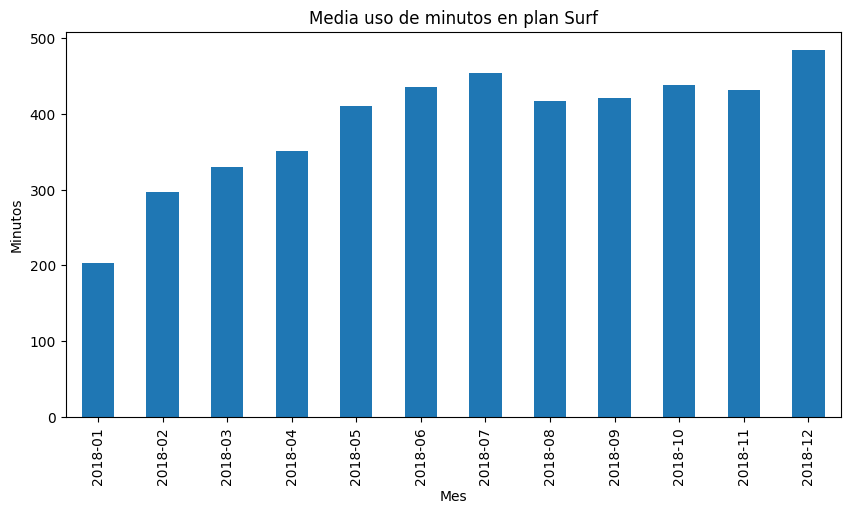

In [307]:
fig_surf_sold.plot(x= 'mes', kind='bar',figsize=(10,5), legend=False)
plt.title('Media uso de minutos en plan Surf')
plt.xlabel('Mes')
plt.ylabel('Minutos')
plt.show()

In [245]:
fig_ultimate_sold = ultimate_sold.groupby(['mes'])['duration'].mean().reset_index()
print('La media de minutos usados por mes en el plan ultimate en el año 2018 es:',np.ceil(fig_ultimate_sold['duration'].mean()))
fig_ultimate_sold

La media de minutos usados por mes en el plan ultimate en el año 2018 es: 397.0


,mes,duration
0,2018-01,193.500000
1,2018-02,470.333333
2,2018-03,304.250000
3,2018-04,336.857143
4,2018-05,406.241379
5,2018-06,387.444444
6,2018-07,427.067797
7,2018-08,421.436620
8,2018-09,437.511628
9,2018-10,455.028571


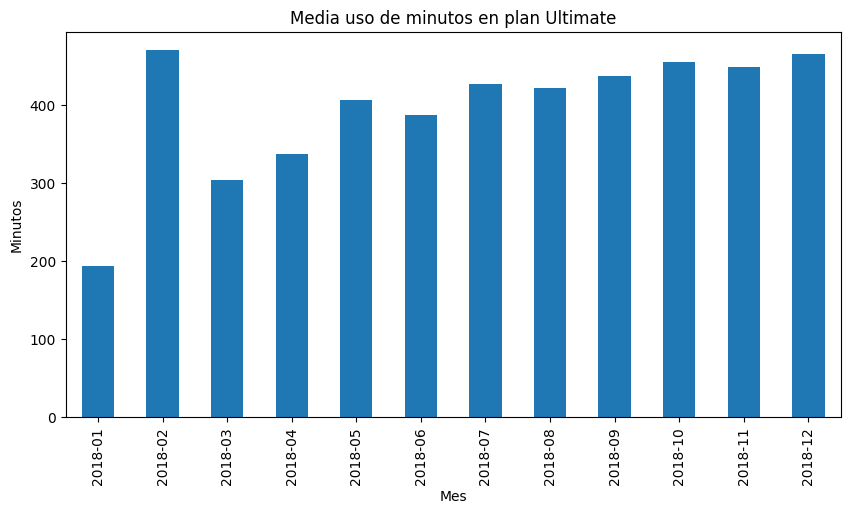

In [246]:
fig_ultimate_sold.plot(x= 'mes', kind='bar',figsize=(10,5), legend=False)
plt.title('Media uso de minutos en plan Ultimate')
plt.xlabel('Mes')
plt.ylabel('Minutos')
plt.show()

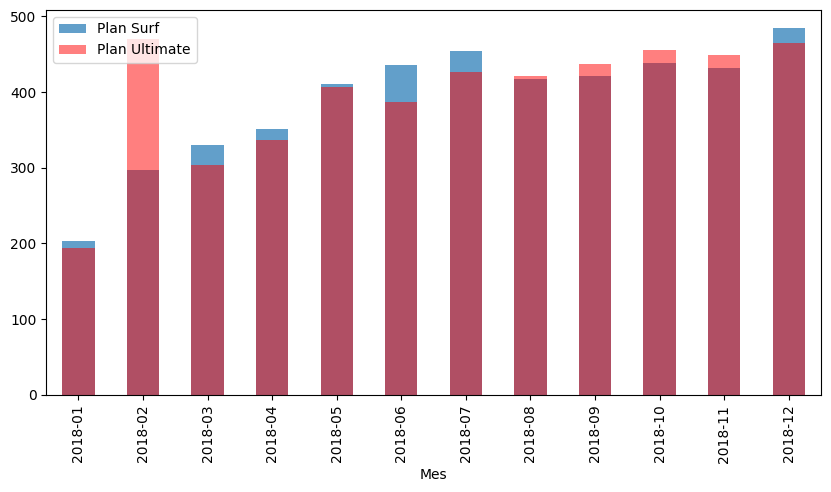

In [247]:
ax=fig_surf_sold.plot(x= 'mes', kind='bar',alpha= 0.7, figsize=(10,5))#, label='Surf Sold')
fig_ultimate_sold.plot(x='mes',kind='bar', alpha=0.5, color='red',xlabel='Mes' ,ax=ax)#,label='Ultimate Sold')
ax.legend(['Plan Surf','Plan Ultimate'])
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Revisor   v2  </b> <a class="tocSkip"></a>

Muy bien, correcto el gráfico. Vemos que en los meses recientes el consumo promedio se iguala.
</div>

In [248]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
comparacion = df_to_analisys.groupby(['plan','mes'])['duration','n_calls_per_client'].mean().reset_index()
comparacion

,plan,mes,duration,n_calls_per_client
0,surf,2018-01,203.000000,30.000000
1,surf,2018-02,297.000000,40.666667
2,surf,2018-03,330.000000,46.434783
3,surf,2018-04,351.540000,48.880000
4,surf,2018-05,410.240000,57.186667
5,surf,2018-06,435.791667,60.093750
6,surf,2018-07,453.733333,63.683333
7,surf,2018-08,417.849057,58.647799
8,surf,2018-09,420.732984,59.020942
9,surf,2018-10,438.991379,61.650862


<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2  </b> <a class="tocSkip"></a>


Muy bien con el cálculo de las media y varianza, aunque solo era necesario calcularlos a nivel total.


</div>

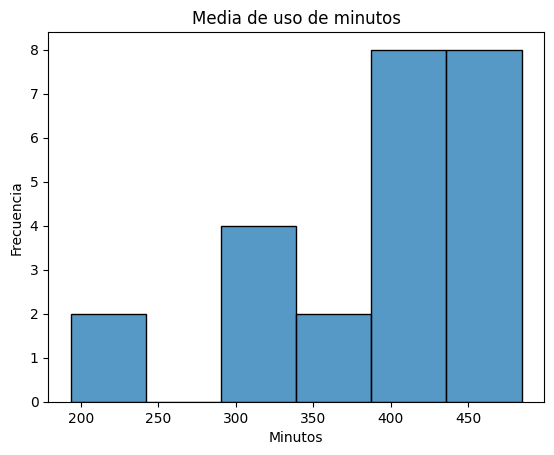

In [310]:
sns.histplot(data=comparacion, x='duration', bins='auto')
plt.title('Media de uso de minutos')
plt.xlabel('Minutos')
plt.ylabel('Frecuencia')
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [251]:
# Calcula la media y la varianza de la duración mensual de llamadas.
print("La media de el plan surf es:",surf_sold['duration'].mean())
varianza_surf = np.var(surf_sold['duration'])
varianza_surf


La media de el plan surf es: 436.51974110032364


52537.03666530514

In [252]:
print("El valor minimo es:",surf_sold['duration'].min(), "Y el valor maximo es:", surf_sold['duration'].max())
print(surf_sold['duration'].var(ddof=0)  ) # verificar que la varianza esta bien, para verificar la exactitud estadistica.
print(surf_sold['duration'].var(ddof=1)  )
(surf_sold['duration'].var(ddof=0))<surf_sold['duration'].var(ddof=1)

El valor minimo es: 0.0 Y el valor maximo es: 1510.0
52537.03666530514
52571.06324345624


True

In [253]:
print(varianza_surf==surf_sold['duration'].var(ddof=0)) #confirma la verdadera varianza poblacional.

True


In [254]:
print("La media de el plan ultimate es:",ultimate_sold['duration'].mean())
varianza_ultimate = np.var(ultimate_sold['duration'])
varianza_ultimate

La media de el plan ultimate es: 434.67601683029454


56494.28633925359

In [255]:
print("El valor minimo es:",ultimate_sold['duration'].min(), "Y el valor maximo es:", ultimate_sold['duration'].max())
print(ultimate_sold['duration'].var(ddof=0)  ) # verificar que la varianza esta bien, para verificar la exactitud estadistica.
print(ultimate_sold['duration'].var(ddof=1)  )
(ultimate_sold['duration'].var(ddof=0))<ultimate_sold['duration'].var(ddof=1)

El valor minimo es: 0.0 Y el valor maximo es: 1369.0
56494.28633925359
56573.632247033434


True

In [256]:
print(varianza_ultimate==ultimate_sold['duration'].var(ddof=0)) #confirma la verdadera varianza poblacional.

True


In [257]:
surf_sold['duration'].describe()

count    1545.000000
mean      436.519741
std       229.283805
min         0.000000
25%       279.000000
50%       430.000000
75%       579.000000
max      1510.000000
Name: duration, dtype: float64

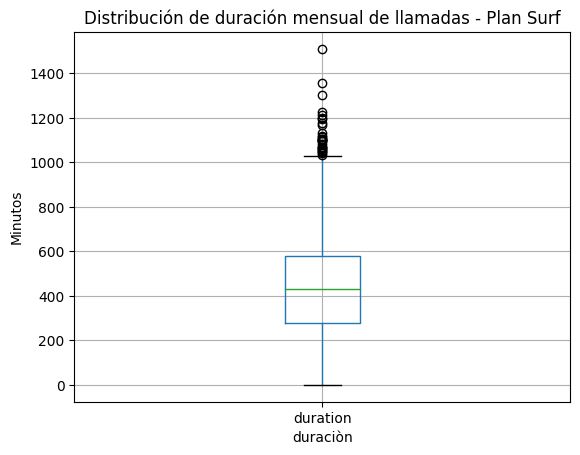

In [258]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
#comparacion.boxplot()
surf_sold[['duration']].boxplot()
plt.title('Distribución de duración mensual de llamadas - Plan Surf')
plt.xlabel('duraciòn')
plt.ylabel('Minutos')
plt.show()

In [303]:
out_surf = surf_sold.query("duration > 1000")
out_surf

,user_id,mes,n_calls_per_client,duration,n_messages,gb_used,first_name,last_name,age,city,...,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,pay
732,1003,2018-12,149.0,1104.0,50.0,26.410293,Reynaldo,Jenkins,52,"Tulsa, OK MSA",...,NaT,50,15360,500,20,10,0.03,0.03,surf,158.12
767,1014,2018-12,150.0,1114.0,64.0,7.609775,Edmundo,Simon,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",...,NaT,50,15360,500,20,10,0.03,0.03,surf,38.84
853,1052,2018-12,177.0,1200.0,266.0,26.009521,Edmond,Hopkins,47,"Houston-The Woodlands-Sugar Land, TX MSA",...,NaT,50,15360,500,20,10,0.03,0.03,surf,167.48
1172,1141,2018-10,141.0,1069.0,21.0,15.334668,Kirstie,Hodges,46,"New York-Newark-Jersey City, NY-NJ-PA MSA",...,NaT,50,15360,500,20,10,0.03,0.03,surf,47.07
1408,1215,2018-12,129.0,1167.0,98.0,33.494414,Adelle,Knapp,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",...,NaT,50,15360,500,20,10,0.03,0.03,surf,231.45
1467,1240,2018-07,164.0,1176.0,9.0,33.935967,Drema,Lopez,61,"Baton Rouge, LA MSA",...,NaT,50,15360,500,20,10,0.03,0.03,surf,230.28
1468,1240,2018-08,161.0,1095.0,15.0,48.779863,Drema,Lopez,61,"Baton Rouge, LA MSA",...,NaT,50,15360,500,20,10,0.03,0.03,surf,377.85
1469,1240,2018-09,180.0,1212.0,12.0,30.128467,Drema,Lopez,61,"Baton Rouge, LA MSA",...,NaT,50,15360,500,20,10,0.03,0.03,surf,201.36
1470,1240,2018-10,162.0,1194.0,9.0,41.141445,Drema,Lopez,61,"Baton Rouge, LA MSA",...,NaT,50,15360,500,20,10,0.03,0.03,surf,310.82
1471,1240,2018-11,155.0,1019.0,11.0,32.856172,Drema,Lopez,61,"Baton Rouge, LA MSA",...,NaT,50,15360,500,20,10,0.03,0.03,surf,215.57


Se le puede hacer un seguimiento a las personas que superen los 'topes' que trae el plan surf y si lo realizan con frecuencia se les puede comunicar si desean mejorar el plan que tienen y pasar del plan surf a el plan ultimate. Si solo superan puntualmente los 'topes' no se les comunica nada, sin embargo si lleva meses asi es mejor comunicarse con el e informarle de las posibilidades.

Sin embargo algunos no llegan a pagar mas de 70 dolares, entonces puede que no sean tan faciles de convencer en que pasen de un plan a otro.
Entonces seria mejor buscar a los que paguen mas de 70 dolares en el plan surf para ofrecerles una mejora al plan ultimate:

In [261]:
out_pay_surf = surf_sold.query("pay > 70")
out_pay_surf

,user_id,mes,n_calls_per_client,duration,n_messages,gb_used,first_name,last_name,age,city,...,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,pay
726,1001,2018-10,65.0,393.0,53.0,21.807119,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,NaT,50,15360,500,20,10,0.03,0.03,surf,90.09
732,1003,2018-12,149.0,1104.0,50.0,26.410293,Reynaldo,Jenkins,52,"Tulsa, OK MSA",...,NaT,50,15360,500,20,10,0.03,0.03,surf,158.12
734,1004,2018-06,44.0,275.0,18.0,20.188301,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",...,NaT,50,15360,500,20,10,0.03,0.03,surf,80.00
735,1004,2018-07,49.0,381.0,26.0,23.942012,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",...,NaT,50,15360,500,20,10,0.03,0.03,surf,110.00
736,1004,2018-08,49.0,354.0,25.0,27.325918,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",...,NaT,50,15360,500,20,10,0.03,0.03,surf,150.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2283,1131,2018-10,NaN,NaN,31.0,20.793564,Shane,Morrison,60,"Los Angeles-Long Beach-Anaheim, CA MSA",...,NaT,50,15360,500,20,10,0.03,0.03,surf,80.00
2290,1194,2018-09,NaN,NaN,76.0,36.423848,Robert,Mclean,40,"San Jose-Sunnyvale-Santa Clara, CA MSA",...,NaT,50,15360,500,20,10,0.03,0.03,surf,240.78
2291,1194,2018-10,NaN,NaN,88.0,30.799209,Robert,Mclean,40,"San Jose-Sunnyvale-Santa Clara, CA MSA",...,NaT,50,15360,500,20,10,0.03,0.03,surf,181.14
2292,1194,2018-11,NaN,NaN,62.0,41.861426,Robert,Mclean,40,"San Jose-Sunnyvale-Santa Clara, CA MSA",...,NaT,50,15360,500,20,10,0.03,0.03,surf,290.36


Aqui ya vemos que las personas pagan mas de 70 dolares por mes, lo cual puede que no les convenga economicamente a ellos, entonces si no se actua a tiempo puede que deje el plan surf pero tambien la empresa pierda el cliente. 

In [262]:
ultimate_sold['duration'].describe()

count     713.000000
mean      434.676017
std       237.852123
min         0.000000
25%       263.000000
50%       425.000000
75%       566.000000
max      1369.000000
Name: duration, dtype: float64

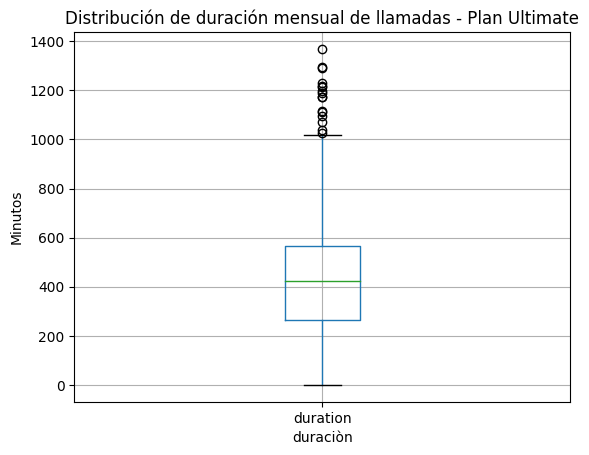

In [263]:
ultimate_sold[['duration']].boxplot()
plt.title('Distribución de duración mensual de llamadas - Plan Ultimate')
plt.xlabel('duraciòn')
plt.ylabel('Minutos')
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

In [304]:
out_ultimate = ultimate_sold.query("duration > 1000")
out_ultimate

,user_id,mes,n_calls_per_client,duration,n_messages,gb_used,first_name,last_name,age,city,...,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,pay
89,1057,2018-10,162.0,1117.0,131.0,27.806865,Theo,Sargent,18,"Atlanta-Sandy Springs-Roswell, GA MSA",...,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate,70.0
90,1057,2018-11,159.0,1027.0,111.0,34.267598,Theo,Sargent,18,"Atlanta-Sandy Springs-Roswell, GA MSA",...,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate,105.0
91,1057,2018-12,158.0,1173.0,137.0,23.877012,Theo,Sargent,18,"Atlanta-Sandy Springs-Roswell, GA MSA",...,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate,70.0
179,1126,2018-11,147.0,1037.0,72.0,20.416172,Jermaine,Mcguire,68,"Chicago-Naperville-Elgin, IL-IN-WI MSA",...,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate,70.0
236,1159,2018-12,138.0,1071.0,110.0,13.638877,Dierdre,Baker,58,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",...,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate,70.0
435,1329,2018-09,168.0,1219.0,91.0,25.898262,Doyle,Nunez,65,"Charleston-North Charleston, SC MSA",...,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate,70.0
436,1329,2018-10,175.0,1215.0,101.0,19.489531,Doyle,Nunez,65,"Charleston-North Charleston, SC MSA",...,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate,70.0
437,1329,2018-11,168.0,1197.0,89.0,25.780518,Doyle,Nunez,65,"Charleston-North Charleston, SC MSA",...,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate,70.0
438,1329,2018-12,191.0,1369.0,97.0,25.253320,Doyle,Nunez,65,"Charleston-North Charleston, SC MSA",...,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate,70.0
497,1382,2018-07,163.0,1095.0,52.0,12.713301,Luci,Kidd,49,"San Diego-Chula Vista-Carlsbad, CA MSA",...,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate,70.0


Si, los del plan surf han gastado de media mas minutos que los del plan ultimate; sin embargo la diferencia no es grande. Por otro lado la maxima cantidad de minutos gastados por un usuario en cada uno de los dos planes si es grande, se diferencian por casi 200 minutos.
En el plan surf hay datos que se salen de una distribucion normal, aproxime el numero a 1000 minutos, en el caso del plan surf, 34 clientes que estan fuera de esa metrica. en el plan ultimate son 18 los que superan la metrica.
Aqui se puede tomar a los usuarios que se salen de la distribucion normaldel plan surf y ofrecerles un plan distinto al plan surf; sin embargo tambien hay que evaluar cuantos mensajes y cuantas gigas de internet gastan estos uruarios.
En el plan surf y plan ultimate la distribucion normal llega a mas de 1000.
En los dos planes hay una mayor tendencia a gastar mas minutos la sgunda mmitad del año, sin embargo, en el plan ultimate hay un gran gasto en el mes 2


<div class="alert alert-block alert-success">
<b>Comentario de Revisor   v2    </b> <a class="tocSkip"></a>

Bien hecho con los análisis de distribución y del cálculo de media y varianza. Estos nos indican que ambos planes son similares en consumo de llamadas. Sin embargo, nota que hubiese sido mejor poner los boxplot lado a lado para poder compararlos.

</div>

### Mensajes

In [264]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
analisis_messages = df_to_analisys.groupby(['mes','plan'])['n_messages'].mean().reset_index()
analisis_messages

,mes,plan,n_messages
0,2018-01,surf,21.000000
1,2018-01,ultimate,20.666667
2,2018-02,surf,21.600000
3,2018-02,ultimate,25.166667
4,2018-03,surf,21.937500
5,2018-03,ultimate,34.714286
6,2018-04,surf,24.166667
7,2018-04,ultimate,28.937500
8,2018-05,surf,33.017857
9,2018-05,ultimate,44.333333


In [265]:
surf_messages = np.ceil(surf_sold.groupby(['mes'])['n_messages'].mean()).reset_index()#lo aproximo a el entero mas cercano hacia arriba porquue no hay un mensaje farccionado, siempre son numeros enteros
surf_messages

,mes,n_messages
0,2018-01,21.0
1,2018-02,22.0
2,2018-03,22.0
3,2018-04,25.0
4,2018-05,34.0
5,2018-06,34.0
6,2018-07,36.0
7,2018-08,38.0
8,2018-09,40.0
9,2018-10,43.0


In [311]:
print("La media de mensajes enviados en el plan surf es:",surf_messages['n_messages'].mean())#esta es la media de la media
varianza_surf_messages = np.var(surf_messages['n_messages'])
varianza_surf_messages #hacer el cambio a numeros enteros en el codigo anterior, afecta la media y la varianza obtenidas en este codigo.

La media de mensajes enviados en el plan surf es: 33.75


79.02083333333333

In [312]:
print("El valor minimo es:",surf_messages['n_messages'].min(), "Y el valor maximo es:", surf_messages['n_messages'].max())
print(surf_messages['n_messages'].var(ddof=0)  ) # verificar que la varianza esta bien, para verificar la exactitud estadistica.
print(surf_messages['n_messages'].var(ddof=1)  )
(surf_messages['n_messages'].var(ddof=0))<surf_messages['n_messages'].var(ddof=1)

El valor minimo es: 21.0 Y el valor maximo es: 49.0
79.02083333333333
86.20454545454545


True

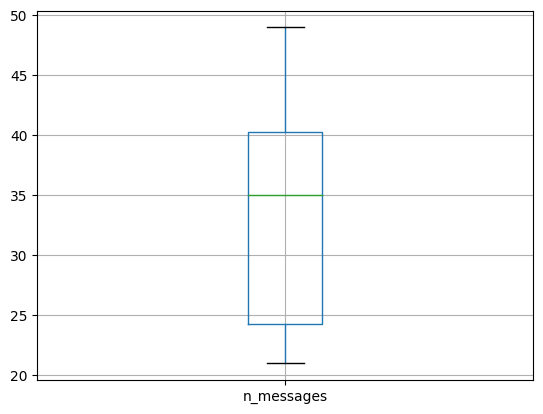

In [313]:
surf_messages.boxplot()
plt.show()

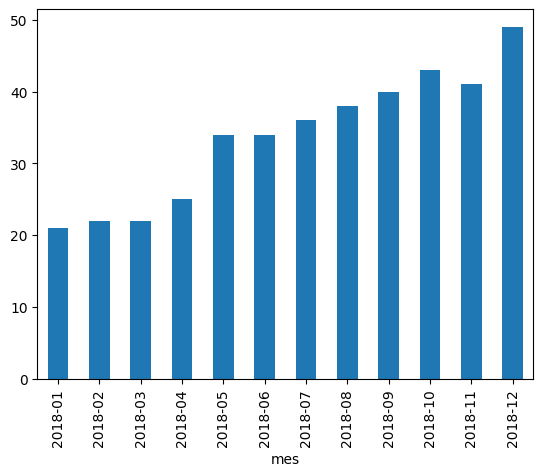

In [314]:
surf_messages.plot(kind='bar', legend=False,x='mes')
plt.show()

In [270]:
ultimate_messages = np.ceil(ultimate_sold.groupby(['mes'])['n_messages'].mean()).reset_index()#lo aproximo a el entero mas cercano hacia arriba porquue no hay un mensaje farccionado, siempre son numeros enteros
ultimate_messages

,mes,n_messages
0,2018-01,21.0
1,2018-02,26.0
2,2018-03,35.0
3,2018-04,29.0
4,2018-05,45.0
5,2018-06,37.0
6,2018-07,42.0
7,2018-08,48.0
8,2018-09,46.0
9,2018-10,47.0


In [315]:
print("La media de mensajes enviados en el plan surf es:",ultimate_messages['n_messages'].mean())#esta es la media de la media
varianza_ultimate_messages = np.var(ultimate_messages['n_messages'])
varianza_ultimate_messages #hacer el cambio a numeros enteros en el codigo anterior, afecta la media y la varianza obtenidas en este codigo.

La media de mensajes enviados en el plan surf es: 39.833333333333336


95.80555555555554

In [316]:
print("El valor minimo es:",ultimate_messages['n_messages'].min(), "Y el valor maximo es:", ultimate_messages['n_messages'].max())
print(ultimate_messages['n_messages'].var(ddof=0)  ) # verificar que la varianza esta bien, para verificar la exactitud estadistica.
print(ultimate_messages['n_messages'].var(ddof=1)  )
(ultimate_messages['n_messages'].var(ddof=0))<ultimate_messages['n_messages'].var(ddof=1)

El valor minimo es: 21.0 Y el valor maximo es: 54.0
95.80555555555554
104.5151515151515


True

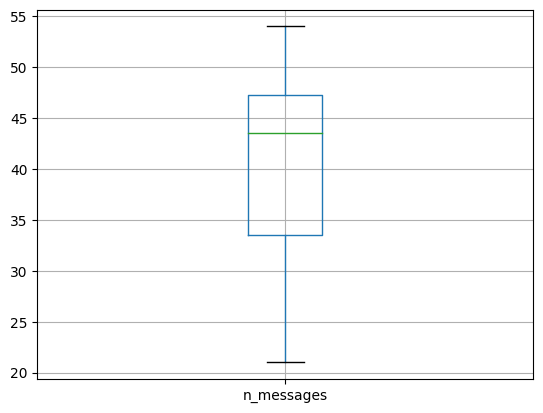

In [317]:
ultimate_messages.boxplot()
plt.show()

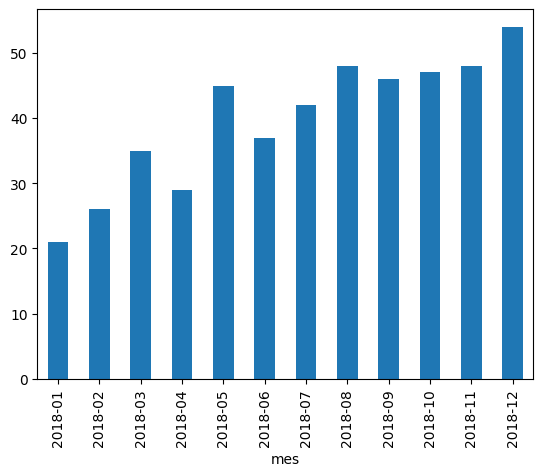

In [274]:
ultimate_messages.plot(kind='bar', legend=False,x='mes')
plt.show()

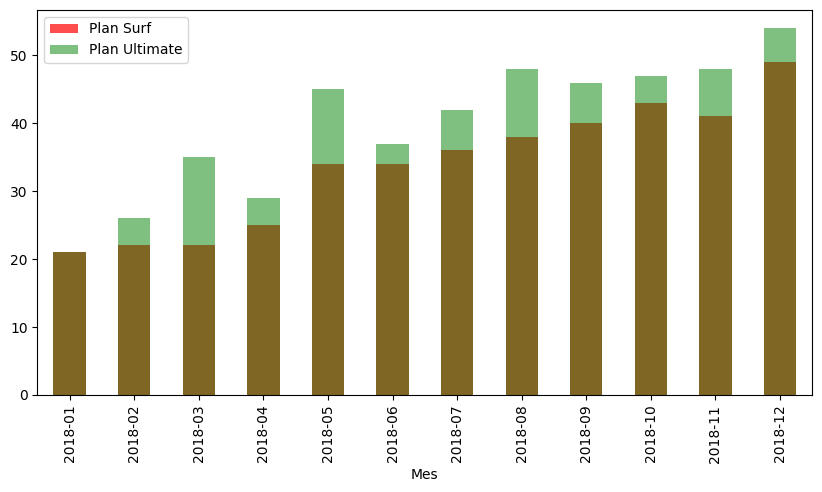

In [321]:
ax=surf_messages.plot(x= 'mes', kind='bar',alpha= 0.7, figsize=(10,5),color='red')
ultimate_messages.plot(x='mes',kind='bar', alpha=0.5, color='green',xlabel='Mes' ,ax=ax)
ax.legend(['Plan Surf','Plan Ultimate'])
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

Al igual que en las llamadas, hay un mayor envio de mensajes en la segunda mitad del año.
En los dos planes se nota un aumento de envio de mensajes a medida que van pasando los meses.
Aunque en el mes 1 los datos son parecidos, del segundo mes en adelante los que mas envian mensajes de texto son los del plan ultimate.
El mes con mas envio de mensajes es el mes 12
Se puede ver como la media de mensajes de el plan surf es 33 y la del plan surf es 39, y en el grafico de caja y bigotes, el 50% de los datos en el plan surf es 35 mientras que en el plan ultimate es masomenos 44.


<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2  </b> <a class="tocSkip"></a>

Excelente, muy bien con la comparación del consumo de mensajes entre los planes. Vemos que se diferencian más que las llamadas.



</div>

### Internet

In [322]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
consumed_internet = df_to_analisys.groupby(['mes','plan'])['gb_used'].mean().reset_index()
consumed_internet

,mes,plan,gb_used
0,2018-01,surf,4.760605
1,2018-01,ultimate,6.755950
2,2018-02,surf,11.893402
3,2018-02,ultimate,16.727352
4,2018-03,surf,13.032656
5,2018-03,ultimate,17.892108
6,2018-04,surf,11.942167
7,2018-04,ultimate,15.743803
8,2018-05,surf,13.788797
9,2018-05,ultimate,16.234846


In [277]:
surf_internet = surf_sold.groupby('mes')['gb_used'].mean().reset_index()
surf_internet

,mes,gb_used
0,2018-01,4.760605
1,2018-02,11.893402
2,2018-03,13.032656
3,2018-04,11.942167
4,2018-05,13.788797
5,2018-06,15.257487
6,2018-07,16.526820
7,2018-08,16.711157
8,2018-09,16.286521
9,2018-10,17.122339


In [323]:
print("La media de internet usado en el plan surf es:",surf_internet['gb_used'].mean(), "gigas")#esta es la media de la media
varianza_surf_internet = np.var(surf_internet['gb_used'])
varianza_surf_internet

La media de internet usado en el plan surf es: 14.2629309102169 gigas


11.910868468137018

In [324]:
print("El valor minimo es:",surf_internet['gb_used'].min(), "Y el valor maximo es:", surf_internet['gb_used'].max())
print(surf_internet['gb_used'].var(ddof=0)  ) # verificar que la varianza esta bien, para verificar la exactitud estadistica.
print(surf_internet['gb_used'].var(ddof=1)  )
(surf_internet['gb_used'].var(ddof=0))<surf_internet['gb_used'].var(ddof=1)

El valor minimo es: 4.76060546875 Y el valor maximo es: 17.763349208891942
11.910868468137018
12.99367469251311


True

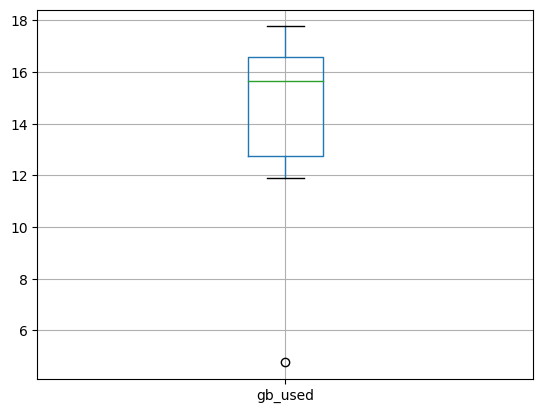

In [325]:
surf_internet.boxplot()
plt.show()

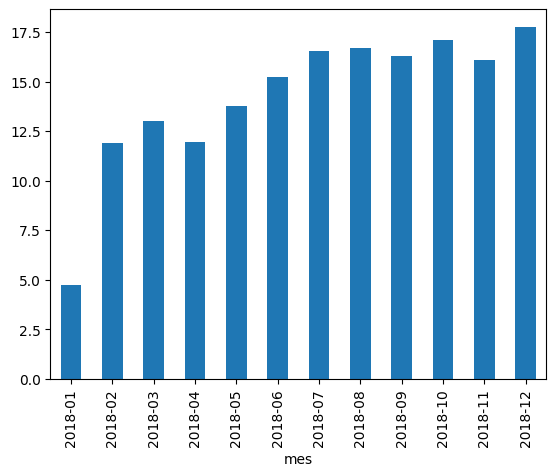

In [281]:
surf_internet.plot(kind='bar', legend=False,x='mes')
plt.show()

In [282]:
ultimate_internet = ultimate_sold.groupby('mes')['gb_used'].mean().reset_index()
ultimate_internet

,mes,gb_used
0,2018-01,6.755950
1,2018-02,16.727352
2,2018-03,17.892108
3,2018-04,15.743803
4,2018-05,16.234846
5,2018-06,14.978439
6,2018-07,15.961664
7,2018-08,17.397188
8,2018-09,16.572138
9,2018-10,17.363566


In [283]:
print("La media de internet usado en el plan ultimate es:",ultimate_internet['gb_used'].mean(), "gigas")#esta es la media de la media
varianza_ultimate_internet = np.var(ultimate_internet['gb_used'])
varianza_ultimate_internet

La media de internet usado en el plan ultimate es: 15.846271234979925 gigas


8.214285012938396

In [284]:
print("El valor minimo es:",ultimate_internet['gb_used'].min(), "Y el valor maximo es:", ultimate_internet['gb_used'].max())
print(ultimate_internet['gb_used'].var(ddof=0)  ) # verificar que la varianza esta bien, para verificar la exactitud estadistica.
print(ultimate_internet['gb_used'].var(ddof=1)  )
(ultimate_internet['gb_used'].var(ddof=0))<ultimate_internet['gb_used'].var(ddof=1)

El valor minimo es: 6.75594970703125 Y el valor maximo es: 17.893742045219362
8.214285012938396
8.961038195932794


True

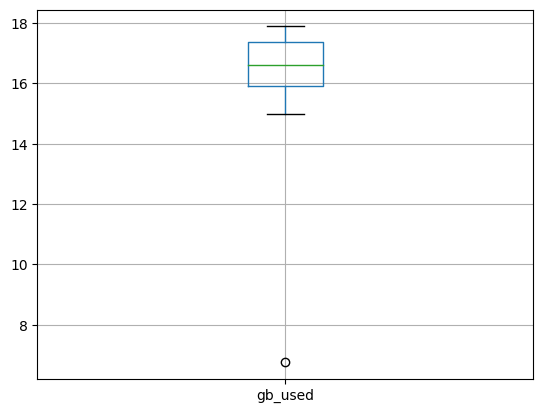

In [285]:
ultimate_internet.boxplot()
plt.show()

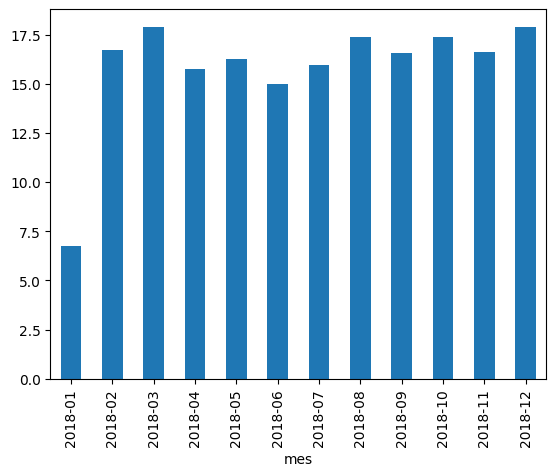

In [286]:
ultimate_internet.plot(kind='bar', legend=False,x='mes')
plt.show()

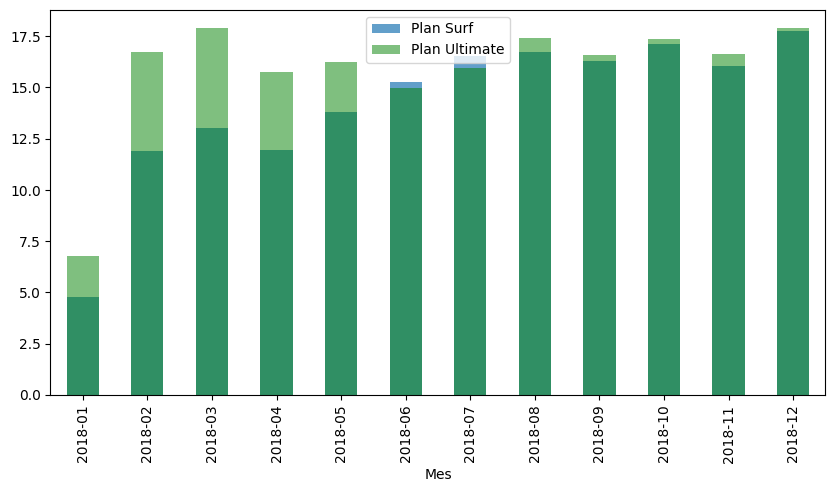

In [287]:
ax=surf_internet.plot(x= 'mes', kind='bar',alpha= 0.7, figsize=(10,5))
ultimate_internet.plot(x='mes',kind='bar', alpha=0.5, color='green',xlabel='Mes' ,ax=ax)
ax.legend(['Plan Surf','Plan Ultimate'])
plt.show()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

Solamente en dos meses los usuarios del plan surf gastaron mas gigas que los del plan ultimate, pero no es un gran diferencia. En el resto de meses el plan ultimate gasta mas gigas de navegacion que el plan surf, aunque el mes 1 sea el mes con menos gasto por parte de los dos planes. 
El mes con mayor consumo sigue siendo el mes 12 y para el plan ultimate el segundo mes con mayor gasto puede ser el mes 3.


<div class="alert alert-block alert-success">
<b>Comentario de Revisor  v2   </b> <a class="tocSkip"></a>

Correcto. El consumo de internet entre planes se ve muy similar.



</div>

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [288]:
surf_ingreso = surf_sold.groupby('mes')['pay'].mean().reset_index()
surf_ingreso

,mes,pay
0,2018-01,20.000000
1,2018-02,34.396667
2,2018-03,45.941304
3,2018-04,40.710600
4,2018-05,47.628182
5,2018-06,49.276289
6,2018-07,62.674050
7,2018-08,63.931173
8,2018-09,58.271495
9,2018-10,65.421224


In [326]:
print("La media de ingreso en el plan surf es:",surf_ingreso['pay'].mean())#esta es la media de la media
varianza_surf_ingreso = np.var(surf_ingreso['pay'])
varianza_surf_ingreso

La media de ingreso en el plan surf es: 51.40102516969467


198.0355130973841

In [327]:
print("El valor minimo es:",surf_ingreso['pay'].min(), "Y el valor maximo es:", surf_ingreso['pay'].max())
print(surf_ingreso['pay'].var(ddof=0)  ) # verificar que la varianza esta bien, para verificar la exactitud estadistica.
print(surf_ingreso['pay'].var(ddof=1)  )
(surf_ingreso['pay'].var(ddof=0))<surf_ingreso['pay'].var(ddof=1)

El valor minimo es: 20.0 Y el valor maximo es: 70.55704402515725
198.0355130973841
216.03874156078265


True

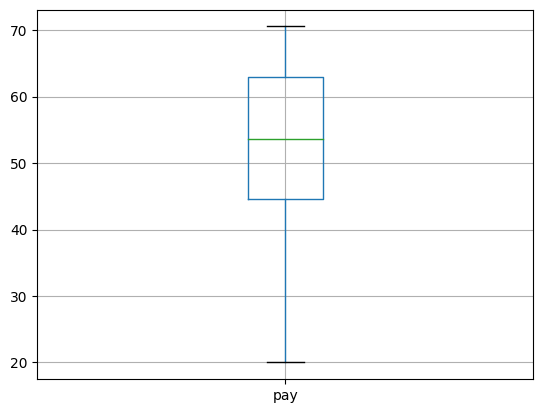

In [328]:
surf_ingreso.boxplot()
plt.show()

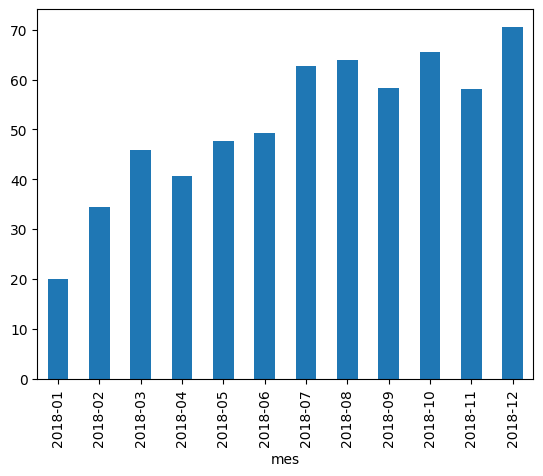

In [292]:
surf_ingreso.plot(kind='bar', legend=False,x='mes')
plt.show()

In [293]:
ultimate_ingreso = ultimate_sold.groupby('mes')['pay'].mean().reset_index()
ultimate_ingreso

,mes,pay
0,2018-01,70.000000
1,2018-02,70.000000
2,2018-03,74.666667
3,2018-04,73.000000
4,2018-05,70.724138
5,2018-06,71.638298
6,2018-07,71.898305
7,2018-08,72.859155
8,2018-09,72.034884
9,2018-10,72.311321


In [294]:
print("La media de ingreso en el plan ultimate es:",ultimate_ingreso['pay'].mean())#esta es la media de la media
varianza_ultimate_ingreso = np.var(ultimate_ingreso['pay'])
varianza_ultimate_ingreso

La media de ingreso en el plan ultimate es: 72.01106825881764


1.7056240167926762

In [295]:
print("El valor minimo es:",ultimate_ingreso['pay'].min(), "Y el valor maximo es:", ultimate_ingreso['pay'].max())
print(ultimate_ingreso['pay'].var(ddof=0)  ) # verificar que la varianza esta bien, para verificar la exactitud estadistica.
print(ultimate_ingreso['pay'].var(ddof=1)  )
(ultimate_ingreso['pay'].var(ddof=0))<ultimate_ingreso['pay'].var(ddof=1)

El valor minimo es: 70.0 Y el valor maximo es: 74.66666666666667
1.7056240167926762
1.8606807455920105


True

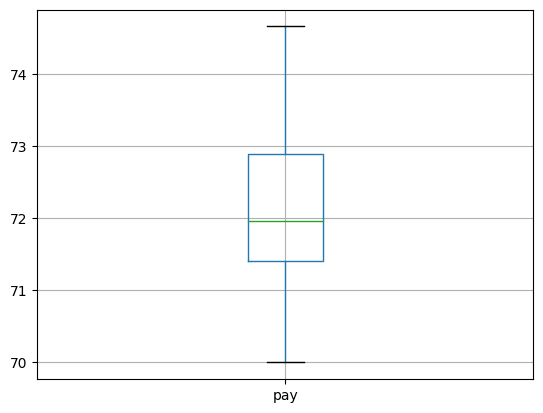

In [296]:
ultimate_ingreso.boxplot()
plt.show()

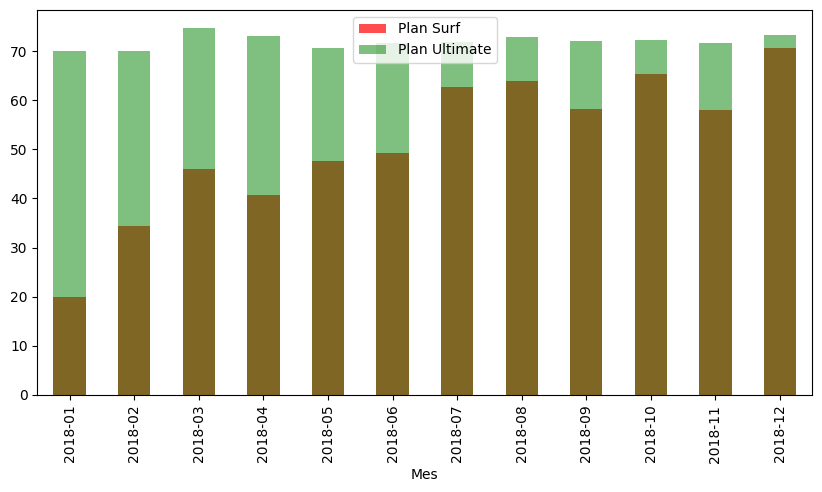

In [297]:
ax=surf_ingreso.plot(x= 'mes', kind='bar',alpha= 0.7, figsize=(10,5),color='red')
ultimate_ingreso.plot(x='mes',kind='bar', alpha=0.5, color='green',xlabel='Mes' ,ax=ax)
ax.legend(['Plan Surf','Plan Ultimate'])
plt.show()

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

Se puede ver que en el plan surf  a medida que van pasando los mese se va aumentando el ingreso, siendo el mes 12 el mes con mayor ingreso por parte del plan surf.
El plan ultimate parece no tener una varicion significativa, a simple vista se puede asumir que el mes tres es el mes de mayor ingreso por parte del plan ultimate.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor  v2    </b> <a class="tocSkip"></a>

Bien hecho. Vemos que los planes se diferencian en el ingreso, a pesar de que el consumo de sus usuarios es muy similar. Esto ocurre porque la estructura de costos de cada plan define intervalos de consumo diferentes, para surf los usuarios tienden a salirse de esos rangos pero los de ultimate no

</div>

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [329]:
# Prueba las hipótesis
from scipy.stats import ttest_ind 
alpha = round(1-0.95,2)
prueba = ttest_ind(surf_ingreso['pay'],ultimate_ingreso['pay'])
print("Estadístico t:", prueba.statistic)
print("Valor p:", prueba.pvalue)
print("Alpha:", alpha)
if prueba.pvalue < alpha:
    print("Rechazar la hipotesis nula")
else:
    print("No se rechaza la hipotesis nula")


Estadístico t: -4.836614609304782
Valor p: 7.83119144714113e-05
Alpha: 0.05
Rechazar la hipotesis nula


Al rechazar la hupitesis nula significa que los promedios de las muestras son diferentes

[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [331]:
# Prueba las hipótesis
df_ny = df_to_analisys.query("city == 'New York-Newark-Jersey City, NY-NJ-PA MSA'")
df_no_ny = df_to_analisys.query("city != 'New York-Newark-Jersey City, NY-NJ-PA MSA'")
print("El promedio de pago de NY-NJ es:",df_ny['pay'].mean(),"con", df_ny['user_id'].count(),"clientes")
print("El promedio de pago de las ciudades que no son NY-NJ es:", df_no_ny['pay'].mean(),"con", df_no_ny['user_id'].count(),"clientes")

alpha = round(1 - 0.99,2)
prueba_ny = ttest_ind(df_ny['pay'],df_no_ny['pay'])
print("Estadístico t:", prueba_ny.statistic)
print("Valor p:", prueba.pvalue)
print("Alpha:", alpha)
if prueba.pvalue < alpha:
    print("Rechazar la hipotesis nula")
else:
    print("No se rechaza la hipotesis nula")


El promedio de pago de NY-NJ es: 59.948015873015876 con 378 clientes
El promedio de pago de las ciudades que no son NY-NJ es: 65.08926233766233 con 1925 clientes
Estadístico t: -1.963182253872187
Valor p: 7.83119144714113e-05
Alpha: 0.01
Rechazar la hipotesis nula


<div class="alert alert-block alert-success">
<b>Comentario de Revisor  v2     </b> <a class="tocSkip"></a>

Bien hecho con los tests. En futuros test de hipótesis con el t-test, pueds usar antes el test de levene para determinar si la varianza se debe usar como igual o diferente.

</div>

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

1. Hay una tendencia a que los usuarios surf gasten mas dinero del reuqerido en la tarifa porque requieren mas llamadas, mensajes o gigas de navegacion.
2. Hay varios usuarios que estan en el plan surf y pagan mas de 70 dolares, por ello se les puede comunicar la mejora a el plan ultimate
3. En vista de que los usuarios del plan surf requieren mas minutos que lo que el plan ofrece , se podria hacer una modificaion a los planes y, de ser posible, agregar un plan con menor cantidad de recursos en comparacion con el plan ultimate y  asi los usuarios que superen el plan surf pero no deseen el plan ultimate puedan acceder a un mejor servicio por parte de la empresa. Eso ayuda a mejorar la relacion cliente-empresa y la fidelizacion de marca.
4. Se puede evidenciar que el gasto de llamadas, mensajes y la navegacion en internet aumentan en la segunda mitad del año y en todos los casos el mes 12 es el de mayor consumo.
5. Se evidencia que la medio de ingreso por parte de los clientes de NY-NJ si es diferente a el de el resto de ciudades, teniendo encuenta que en esa ciudad hay 378 clients y en las demas ciudades hay 1925 clientes.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor   v2        </b> <a class="tocSkip"></a>

Muy buenas conclusiones! Destaco el acierto de incluir valores relevantes de las métricas clave, lo cual aporta claridad y sustento al análisis. Además, resumiste de forma efectiva los hallazgos principales. ¡Buen trabajo!


    
</div>